In [1]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import numpy as np
import pandas as pd
from pprint import pprint
import Cleaner
import Similar

In [2]:
Data = pd.read_csv('Resume_data.csv')

In [32]:
def get_list_of_words(document):
    Document = []
    for a in document:
        raw = a.split(" ")
        Document.append(raw)
    return Document


In [33]:
document = get_list_of_words(Data['Cleaned'])

In [37]:
# document

In [41]:
id2word = corpora.Dictionary(document)
corpus = [id2word.doc2bow(text) for text in document]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"Data" + 0.018*"learn" + 0.016*"Machine" + 0.014*"Project" + '
  '0.014*"Learning" + 0.013*"Intelligence" + 0.012*"use" + 0.012*"Artificial" '
  '+ 0.009*"ML" + 0.008*"machine"'),
 (1,
  '0.013*"experience" + 0.010*"year" + 0.008*"Web" + 0.008*"skill" + '
  '0.007*"Top" + 0.007*"Current" + 0.007*"use" + 0.006*"Software" + '
  '0.006*"PHP" + 0.006*"back"'),
 (2,
  '0.009*"Months" + 0.009*"Years" + 0.004*"functional" + 0.003*"specification" '
  '+ 0.003*"Apache" + 0.003*"Chennai" + 0.003*"Spark" + 0.003*"enhancement" + '
  '0.003*"methodology" + 0.003*"ElectronicsTelecommunication"'),
 (3,
  '0.013*"use" + 0.010*"learn" + 0.007*"application" + 0.007*"develop" + '
  '0.007*"experience" + 0.007*"Project" + 0.006*"design" + 0.006*"Offsite" + '
  '0.005*"model" + 0.005*"system"'),
 (4,
  '0.011*"experience" + 0.011*"year" + 0.009*"use" + 0.008*"Months" + '
  '0.007*"Years" + 0.007*"Current" + 0.006*"Top" + 0.006*"Location" + '
  '0.005*"database" + 0.005*"IT"')]


In [121]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=Document):
    # Init output
#     sent_topics_df = pd.DataFrame()
    sent_topics_df = []
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df.append([i, int(topic_num), round(prop_topic,4)*100, topic_keywords])
            else:
                break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=Document)
# df_topic_sents_keywords['Names'] = Data['Name']
# Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# df_dominant_topic.head(20)


In [122]:
df_some = pd.DataFrame(df_topic_sents_keywords, columns=['Document No','Dominant Topic', 'Topic % Contribution', 'Keywords'])

In [123]:
df_some['Names'] = Data['Name']

In [124]:
df_some

,Document No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Names
0,0,4,86.070001,"experience, year, use, Months, Years, Current,...",ALANKRIT NIRJHARPremium CV Featured Resume.docx
1,1,3,99.989998,"use, learn, application, develop, experience, ...",Amarpreet SinghPremium CV Featured Resume.docx
2,2,4,99.959999,"experience, year, use, Months, Years, Current,...",Shambhai MishraFeatured Resume.docx
3,3,1,99.980003,"experience, year, Web, skill, Top, Current, us...",Amruta B.pdf
4,4,1,53.200001,"experience, year, Web, skill, Top, Current, us...",Dhavakumar AmarntharajanFeatured Resume.docx
5,5,1,99.980003,"experience, year, Web, skill, Top, Current, us...",DIVYA PRAKASH SINGHFeatured Resume.docx
6,6,1,99.970001,"experience, year, Web, skill, Top, Current, us...",Abhishek SharmaFeatured Resume.docx
7,7,4,99.980003,"experience, year, use, Months, Years, Current,...",Manoj KumarFeatured Resume.docx
8,8,0,99.989998,"Data, learn, Machine, Project, Learning, Intel...",Seshadri Sastry Kunapuli.docx
9,9,3,99.989998,"use, learn, application, develop, experience, ...",SNEHA SAHUFeatured Resume.docx


In [125]:
df_some.head(21)

,Document No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Names
0,0,4,86.070001,"experience, year, use, Months, Years, Current,...",ALANKRIT NIRJHARPremium CV Featured Resume.docx
1,1,3,99.989998,"use, learn, application, develop, experience, ...",Amarpreet SinghPremium CV Featured Resume.docx
2,2,4,99.959999,"experience, year, use, Months, Years, Current,...",Shambhai MishraFeatured Resume.docx
3,3,1,99.980003,"experience, year, Web, skill, Top, Current, us...",Amruta B.pdf
4,4,1,53.200001,"experience, year, Web, skill, Top, Current, us...",Dhavakumar AmarntharajanFeatured Resume.docx
5,5,1,99.980003,"experience, year, Web, skill, Top, Current, us...",DIVYA PRAKASH SINGHFeatured Resume.docx
6,6,1,99.970001,"experience, year, Web, skill, Top, Current, us...",Abhishek SharmaFeatured Resume.docx
7,7,4,99.980003,"experience, year, use, Months, Years, Current,...",Manoj KumarFeatured Resume.docx
8,8,0,99.989998,"Data, learn, Machine, Project, Learning, Intel...",Seshadri Sastry Kunapuli.docx
9,9,3,99.989998,"use, learn, application, develop, experience, ...",SNEHA SAHUFeatured Resume.docx


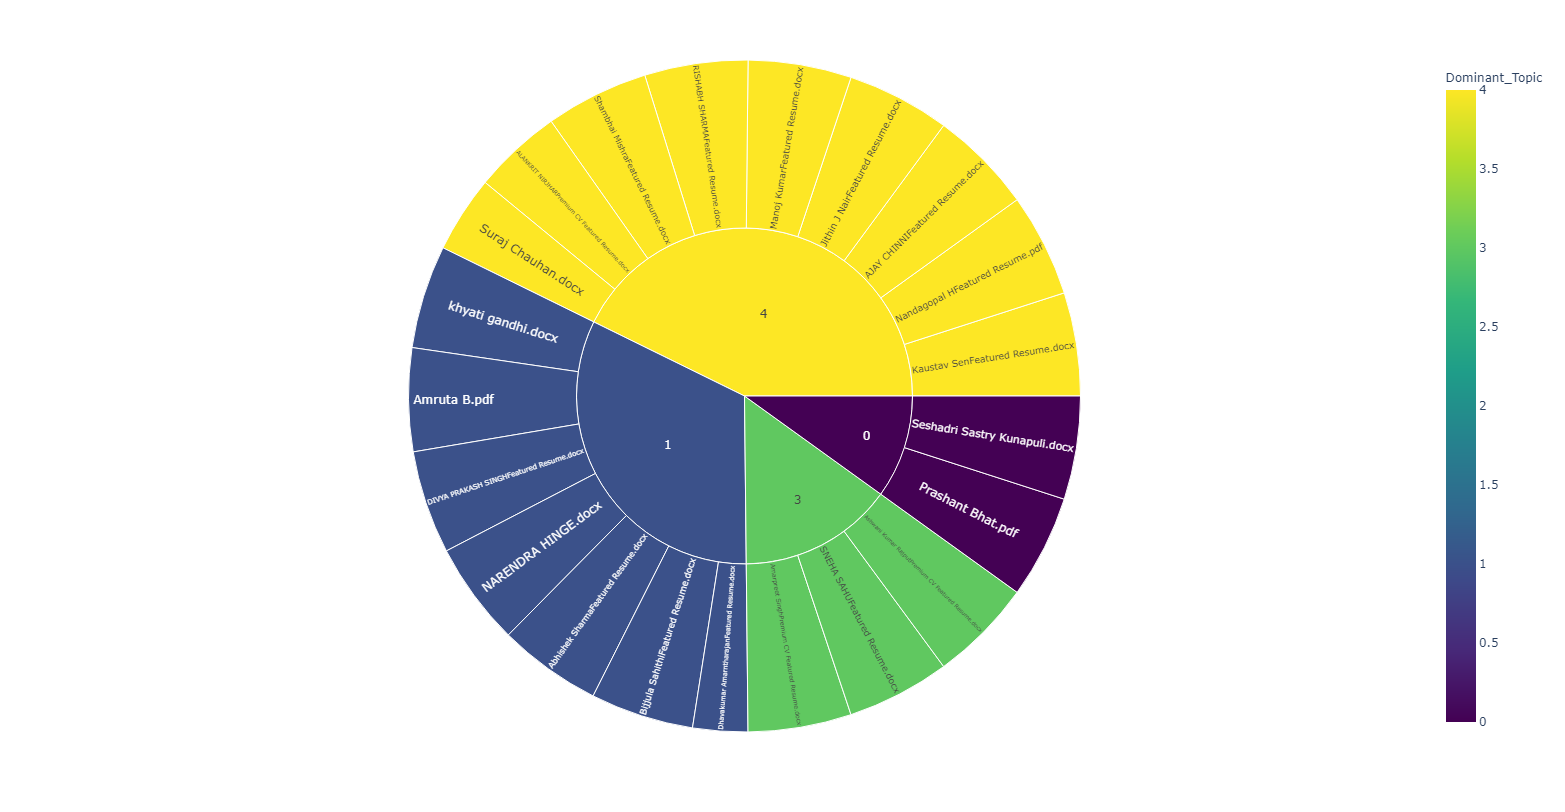

In [141]:
import plotly.express as px
df = df_some
fig = px.sunburst(df, path=['Dominant_Topic','Names'], values='Topic_Perc_Contrib',color='Dominant_Topic',color_continuous_scale='viridis',width=800, height=800)
fig.show()

IndexError: list index out of range

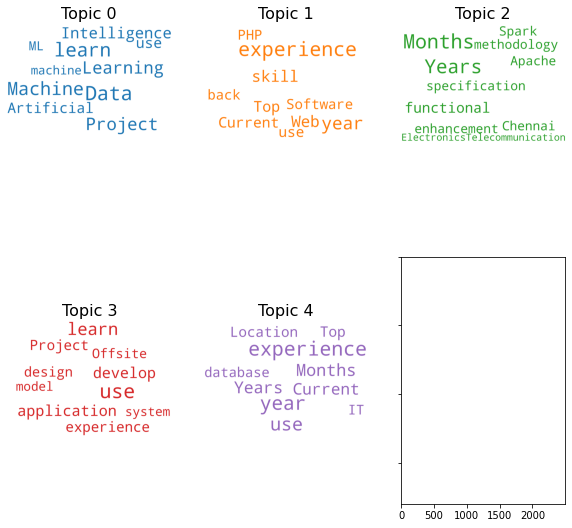

In [129]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()